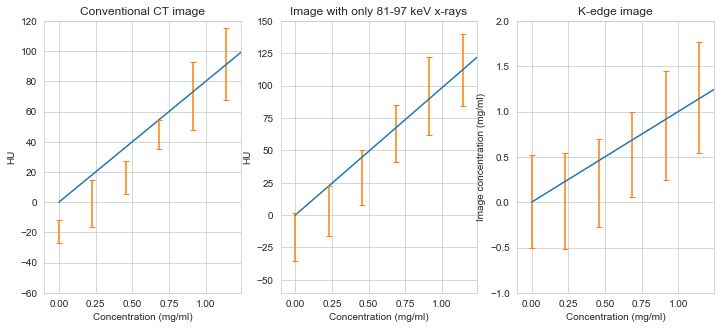

In [32]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder = 'phantom_scan_2'
concentrations = [1.143, 0.914, 0.686, 0.457, 0.229, 0]

# Get the values of the 19.67 mg/ml vial in the standard image
norm_ct = np.load(os.path.join(directory, 'phantom_scan_1', 'Norm CT', 'CT_norm.npy'))
contrast_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'contrast_masks_Au.npy'))
water_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'water_mask.npy'))

hu_high = np.zeros(3)
for i in range(3):
    hu_high[i] = np.nanmean(norm_ct[i, 12]*contrast_norm[0])


# Load the 5 nm image data
ct = np.load(os.path.join(directory, folder, 'Norm CT', 'CT_norm.npy'))[:, 11:15]
k_au = np.load(os.path.join(directory, folder, 'Norm CT', 'K-edge_Au.npy'))[11:15]

# Load the contrast masks
cont_np = np.load(os.path.join(directory, folder, 'contrast_masks_Au.npy'))
hu_vals = np.zeros((3, 2, 6)) # Bin, Mean and std of each of the vials from all 4 slices
k_vals = np.zeros((2, 6))

# Calculate the HU vals for each of the contrast vials
for i in range(3):
    for j in range(6):
        temp_ct = ct[i]*cont_np[j]
        hu_vals[i, 0, j] = np.nanmean(temp_ct)
        hu_vals[i, 1, j] = np.nanstd(temp_ct)

# Same for the K-edge data
for j in range(6):
    temp_k = k_au*cont_np[j]
    k_vals[0, j] = np.nanmean(temp_k)
    k_vals[1, j] = np.nanstd(temp_k)

xpts = np.linspace(0, 30, 500)

# K-edge data should follow a 1-to-1 line
ypts_k = np.linspace(0, 30, 500)

# HU data will have slope (HU)/high concentration
# ypts_hu_sum = hu_high[2]/19.67 * xpts
# ypts_hu_high = hu_high[1]/19.67 * xpts

ypts_hu_sum = hu_vals[2, 0, 0]/concentrations[0] * xpts
ypts_hu_high = hu_vals[1, 0, 0]/concentrations[0] * xpts

sns.set_style('whitegrid')
fig1, ax1 = plt.subplots(1, 3, figsize=(12, 5))
ax1[0].plot(xpts, ypts_hu_sum)
ax1[0].errorbar(concentrations, hu_vals[2, 0], yerr=hu_vals[2, 1], fmt='none', capsize=3)
ax1[0].set_title('Conventional CT image')
ax1[0].set_xlabel('Concentration (mg/ml)')
ax1[0].set_ylabel('HU')
ax1[0].set_xlim([-0.1, concentrations[0]+0.1])
ax1[0].set_ylim([-60, 120])

ax1[1].plot(xpts, ypts_hu_high)
ax1[1].errorbar(concentrations, hu_vals[1, 0], yerr=hu_vals[1, 1], fmt='none', capsize=3)
ax1[1].set_title('Image with only 81-97 keV x-rays')
ax1[1].set_xlabel('Concentration (mg/ml)')
ax1[1].set_ylabel('HU')
ax1[1].set_xlim([-0.1, concentrations[0]+0.1])
ax1[1].set_ylim([-60, 150])

ax1[2].plot(xpts, ypts_k)
ax1[2].errorbar(concentrations, k_vals[0], yerr=k_vals[1], fmt='none', capsize=3)
ax1[2].set_title('K-edge image')
ax1[2].set_xlabel('Concentration (mg/ml)')
ax1[2].set_ylabel('Image concentration (mg/ml)')
ax1[2].set_xlim([-0.1, concentrations[0]+0.1])
ax1[2].set_ylim([-1, 2])

fig1.show()

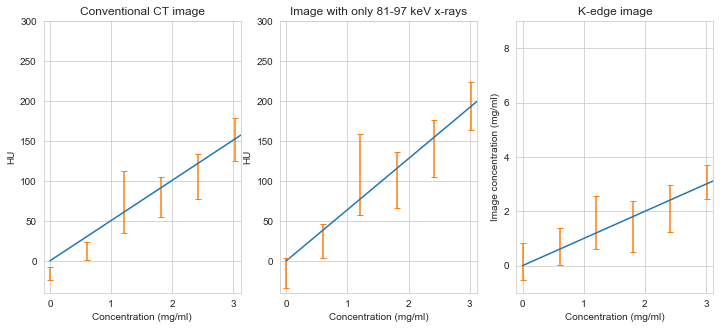

In [33]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder = 'phantom_scan_3'
concentrations = [3.020, 2.416, 1.812, 1.208, 0.604, 0]
# concentrations = [24.46, 12.23, 6.12, 3.06, 0]

# Get the values of the 19.67 mg/ml vial in the standard image
norm_ct = np.load(os.path.join(directory, 'phantom_scan_1', 'Norm CT', 'CT_norm.npy'))
contrast_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'contrast_masks_Au.npy'))
water_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'water_mask.npy'))

hu_high = np.zeros(3)
for i in range(3):
    hu_high[i] = np.nanmean(norm_ct[i, 12]*contrast_norm[0])

# Load the 5 nm image data
ct = np.load(os.path.join(directory, folder, 'Norm CT', 'CT_norm.npy'))[:, 11:15]
k_au = np.load(os.path.join(directory, folder, 'Norm CT', 'K-edge_Au.npy'))[11:15]

# Load the contrast masks
cont_np = np.load(os.path.join(directory, folder, 'contrast_masks_Au.npy'))
hu_vals = np.zeros((3, 2, 6)) # Bin, Mean and std of each of the vials from all 4 slices
k_vals = np.zeros((2, 6))

# Calculate the HU vals for each of the contrast vials
for i in range(3):
    for j in range(6):
        temp_ct = ct[i]*cont_np[j]
        hu_vals[i, 0, j] = np.nanmean(temp_ct)
        hu_vals[i, 1, j] = np.nanstd(temp_ct)

# Same for the K-edge data
for j in range(6):
    temp_k = k_au*cont_np[j]
    k_vals[0, j] = np.nanmean(temp_k)
    k_vals[1, j] = np.nanstd(temp_k)

xpts = np.linspace(0, 30, 500)

# K-edge data should follow a 1-to-1 line
ypts_k = np.linspace(0, 30, 500)

# HU data will have slope (HU)/high concentration
# ypts_hu_sum = hu_high[2]/19.67 * xpts
# ypts_hu_high = hu_high[1]/19.67 * xpts

ypts_hu_sum = hu_vals[2, 0, 0]/concentrations[0] * xpts
ypts_hu_high = hu_vals[1, 0, 0]/concentrations[0] * xpts

sns.set_style('whitegrid')
fig2, ax2 = plt.subplots(1, 3, figsize=(12, 5))
ax2[0].plot(xpts, ypts_hu_sum)
ax2[0].errorbar(concentrations, hu_vals[2, 0], yerr=hu_vals[2, 1], fmt='none', capsize=3)
ax2[0].set_title('Conventional CT image')
ax2[0].set_xlabel('Concentration (mg/ml)')
ax2[0].set_ylabel('HU')
ax2[0].set_xlim([-0.1, concentrations[0]+0.1])
ax2[0].set_ylim([-40, 300])

ax2[1].plot(xpts, ypts_hu_high)
ax2[1].errorbar(concentrations, hu_vals[1, 0], yerr=hu_vals[1, 1], fmt='none', capsize=3)
ax2[1].set_title('Image with only 81-97 keV x-rays')
ax2[1].set_xlabel('Concentration (mg/ml)')
ax2[1].set_ylabel('HU')
ax2[1].set_xlim([-0.1, concentrations[0]+0.1])
ax2[1].set_ylim([-40, 300])

ax2[2].plot(xpts, ypts_k)
ax2[2].errorbar(concentrations, k_vals[0], yerr=k_vals[1], fmt='none', capsize=3)
ax2[2].set_title('K-edge image')
ax2[2].set_xlabel('Concentration (mg/ml)')
ax2[2].set_ylabel('Image concentration (mg/ml)')
ax2[2].set_xlim([-0.1, concentrations[0]+0.1])
ax2[2].set_ylim([-1, 9])

fig2.show()

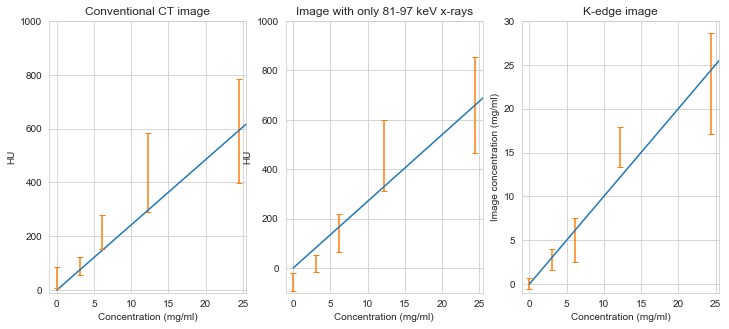

In [34]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-11_CT_AuNPs'
folder = 'phantom_scan_5'
concentrations = [24.46, 12.23, 6.12, 3.06, 0]

# Get the values of the 19.67 mg/ml vial in the standard image
norm_ct = np.load(os.path.join(directory, 'phantom_scan_1', 'Norm CT', 'CT_norm.npy'))
contrast_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'contrast_masks_Au.npy'))
water_norm = np.load(os.path.join(directory, 'phantom_scan_1', 'water_mask.npy'))

hu_high = np.zeros(3)
for i in range(3):
    hu_high[i] = np.nanmean(norm_ct[i, 12]*contrast_norm[0])

# Load the 5 nm image data
ct = np.load(os.path.join(directory, folder, 'Norm CT', 'CT_norm.npy'))[:, 11:15]
k_au = np.load(os.path.join(directory, folder, 'Norm CT', 'K-edge_Au.npy'))[11:15]

# Load the contrast masks
cont_np = np.load(os.path.join(directory, folder, 'contrast_masks_Au.npy'))
hu_vals = np.zeros((3, 2, 5)) # Bin, Mean and std of each of the vials from all 4 slices
k_vals = np.zeros((2, 5))

# Calculate the HU vals for each of the contrast vials
for i in range(3):
    for j in range(5):
        temp_ct = ct[i]*cont_np[j]
        hu_vals[i, 0, j] = np.nanmean(temp_ct)
        hu_vals[i, 1, j] = np.nanstd(temp_ct)

# Same for the K-edge data
for j in range(5):
    temp_k = k_au*cont_np[j]
    k_vals[0, j] = np.nanmean(temp_k)
    k_vals[1, j] = np.nanstd(temp_k)

xpts = np.linspace(0, 30, 500)

# K-edge data should follow a 1-to-1 line
ypts_k = np.linspace(0, 30, 500)

# HU data will have slope (HU)/high concentration
# ypts_hu_sum = hu_high[2]/19.67 * xpts
# ypts_hu_high = hu_high[1]/19.67 * xpts

ypts_hu_sum = hu_vals[2, 0, 0]/concentrations[0] * xpts
ypts_hu_high = hu_vals[1, 0, 0]/concentrations[0] * xpts

sns.set_style('whitegrid')
fig3, ax3 = plt.subplots(1, 3, figsize=(12, 5))
ax3[0].plot(xpts, ypts_hu_sum)
ax3[0].errorbar(concentrations, hu_vals[2, 0], yerr=hu_vals[2, 1], fmt='none', capsize=3)
ax3[0].set_title('Conventional CT image')
ax3[0].set_xlabel('Concentration (mg/ml)')
ax3[0].set_ylabel('HU')
ax3[0].set_xlim([-1, concentrations[0]+1])
ax3[0].set_ylim([-10, 1000])

ax3[1].plot(xpts, ypts_hu_high)
ax3[1].errorbar(concentrations, hu_vals[1, 0], yerr=hu_vals[1, 1], fmt='none', capsize=3)
ax3[1].set_title('Image with only 81-97 keV x-rays')
ax3[1].set_xlabel('Concentration (mg/ml)')
ax3[1].set_ylabel('HU')
ax3[1].set_xlim([-1, concentrations[0]+1])
ax3[1].set_ylim([-100, 1000])

ax3[2].plot(xpts, ypts_k)
ax3[2].errorbar(concentrations, k_vals[0], yerr=k_vals[1], fmt='none', capsize=3)
ax3[2].set_title('K-edge image')
ax3[2].set_xlabel('Concentration (mg/ml)')
ax3[2].set_ylabel('Image concentration (mg/ml)')
ax3[2].set_xlim([-1, concentrations[0]+1])
ax3[2].set_ylim([-1, 30])

fig3.show()